In [1]:
import pandas as pd
import numpy as np

In [2]:
# old data
old_data = pd.read_csv('Israel Covid Dataset.csv')
old_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


C:\Users\ChenPoYen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
old_data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [4]:
# preprocessing old data : turn None into nan
old_data_pre = old_data.copy()
old_data_pre[old_data_pre == 'None'] = np.nan
old_data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278596 non-null  object
 2   fever                278596 non-null  object
 3   sore_throat          278847 non-null  object
 4   shortness_of_breath  278847 non-null  object
 5   head_ache            278847 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     151528 non-null  object
 8   gender               259285 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [5]:
old_data_pre.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,NaN,female,Other
1,2020-04-30,1,0,0,0,0,negative,NaN,female,Other
2,2020-04-30,0,1,0,0,0,negative,NaN,male,Other
3,2020-04-30,1,0,0,0,0,negative,NaN,female,Other
4,2020-04-30,1,0,0,0,0,negative,NaN,male,Other


In [6]:
# select required data
data = old_data_pre.loc[(old_data_pre['test_date'] >= '2020-03-22') & (old_data_pre['test_date'] <= '2020-04-07')]
data.reset_index(inplace = True, drop = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102717 entries, 0 to 102716
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            102717 non-null  object
 1   cough                102476 non-null  object
 2   fever                102475 non-null  object
 3   sore_throat          102717 non-null  object
 4   shortness_of_breath  102717 non-null  object
 5   head_ache            102717 non-null  object
 6   corona_result        102717 non-null  object
 7   age_60_and_above     102717 non-null  object
 8   gender               100455 non-null  object
 9   test_indication      102717 non-null  object
dtypes: object(10)
memory usage: 7.8+ MB


In [7]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-07,0,0,0,0,0,negative,No,male,Other
1,2020-04-07,0,0,0,0,0,negative,Yes,female,Other
2,2020-04-07,0,0,0,0,0,negative,Yes,male,Other
3,2020-04-07,0,0,0,0,0,negative,No,male,Other
4,2020-04-07,0,0,0,0,0,negative,No,female,Other


In [8]:
data.isnull().sum()

test_date                 0
cough                   241
fever                   242
sore_throat               0
shortness_of_breath       0
head_ache                 0
corona_result             0
age_60_and_above          0
gender                 2262
test_indication           0
dtype: int64

# 資料前處理

In [9]:
# turn yes and no into 1 and 0
data_1and0 = data.replace(['Yes', 'No', 'negative', 'positive'],
                          [1, 0, 0, 1]).copy()
data_1and0.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-07,0,0,0,0,0,0,0,male,Other
1,2020-04-07,0,0,0,0,0,0,1,female,Other
2,2020-04-07,0,0,0,0,0,0,1,male,Other
3,2020-04-07,0,0,0,0,0,0,0,male,Other
4,2020-04-07,0,0,0,0,0,0,0,female,Other


In [10]:
# delete rows that corona result is nan
data_dropped = data_1and0.loc[data_1and0['corona_result'] != 'other'].copy()
data_dropped.isnull().sum()

test_date                 0
cough                   241
fever                   242
sore_throat               0
shortness_of_breath       0
head_ache                 0
corona_result             0
age_60_and_above          0
gender                 2250
test_indication           0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer, KNNImputer

In [12]:
# impute nan with knn imputer
# data_nodate = data_encoded.drop(columns = ['test_date']).copy()
# knn_imputer = KNNImputer()
# df = data_nodate.copy()
# df = pd.DataFrame(knn_imputer.fit_transform(data_nodate), columns = data_nodate.columns)
# df.to_csv('imputed.csv')
# df.info()

In [14]:
# fill mode
data_nodate = data_dropped.drop(columns = ['test_date']).copy()
mode_imputer = SimpleImputer(strategy = 'most_frequent')
mode_imputer = mode_imputer.fit(data_nodate[['cough', 'fever', 'gender']])
filled = data_nodate.copy()
filled[['cough', 'fever', 'gender']] = mode_imputer.transform(data_nodate[['cough', 'fever', 'gender']])
# df.to_csv('imputed.csv')
filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101482 entries, 0 to 102716
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   cough                101482 non-null  object
 1   fever                101482 non-null  object
 2   sore_throat          101482 non-null  object
 3   shortness_of_breath  101482 non-null  object
 4   head_ache            101482 non-null  object
 5   corona_result        101482 non-null  object
 6   age_60_and_above     101482 non-null  int64 
 7   gender               101482 non-null  object
 8   test_indication      101482 non-null  object
dtypes: int64(1), object(8)
memory usage: 7.7+ MB


In [15]:
filled.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [32]:
df = filled.copy()
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,0,male,Other
1,0,0,0,0,0,0,1,female,Other
2,0,0,0,0,0,0,1,male,Other
3,0,0,0,0,0,0,0,male,Other
4,0,0,0,0,0,0,0,female,Other


# 相關係數熱圖

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

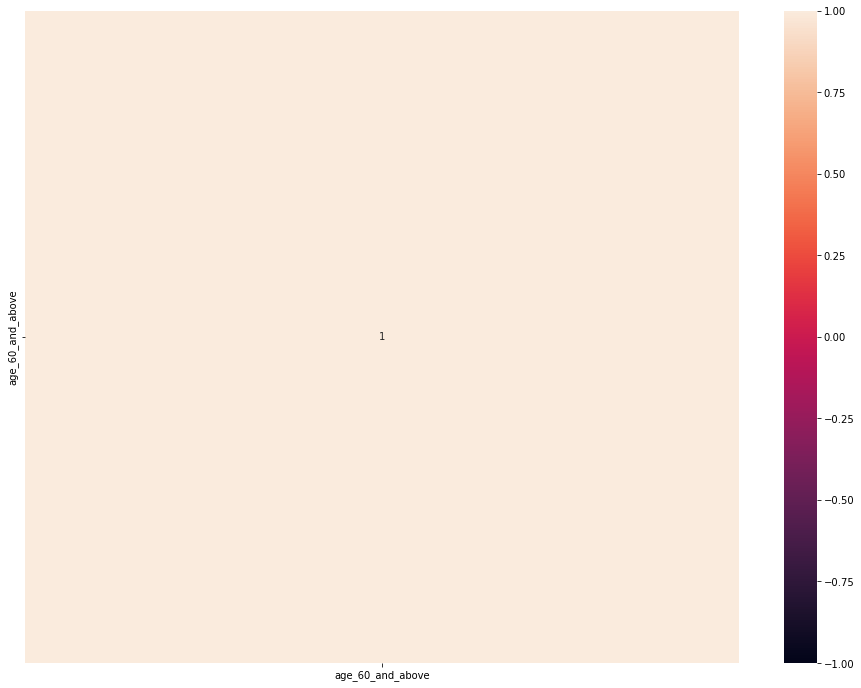

In [35]:
plt.figure(figsize = (16, 12))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True)

In [37]:
# to csv
df.to_csv('Israel Covid Dataset To All Nominal.csv', index = False)

In [39]:
df = pd.read_csv('Israel Covid Dataset To All Nominal.csv')
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,No,No,No,No,No,negative,No,male,Other
1,No,No,No,No,No,negative,Yes,female,Other
2,No,No,No,No,No,negative,Yes,male,Other
3,No,No,No,No,No,negative,No,male,Other
4,No,No,No,No,No,negative,No,female,Other


# 欄位資料分布視覺化

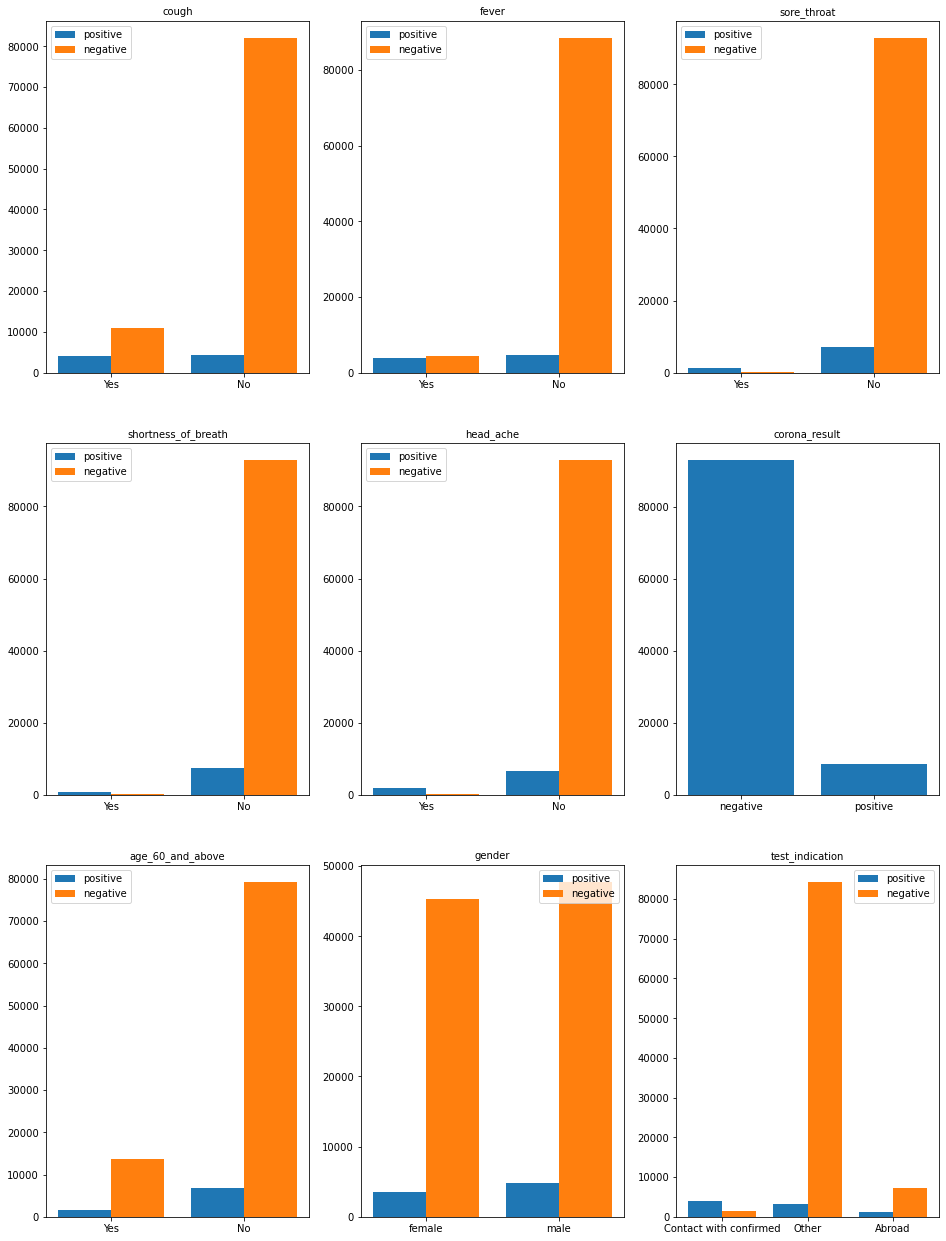

In [41]:
df1 = df.astype('str').copy()
plt.figure(figsize = (16, 22))
column_names = list(df1.columns.values)
for i in range(0, 9):
    if i == 5:
        plt.subplot(3, 3, i+1)
        x = list(set(df1[column_names[i]]))
        y = [len(df1[df1[column_names[i]] == j]) for j in x]
        plt.bar(x, y)
    #         plt.ylabel('count')
        plt.title(column_names[i], fontsize = 10)
    elif i == 8:
        plt.subplot(3, 3, i+1)
        xl = np.arange(3)
        x = list(set(df1[column_names[i]]))
        y1 = [len(df1[(df1[column_names[i]] == j) & (df1['corona_result'] == 'positive')]) for j in x]
        y2 = [len(df1[(df1[column_names[i]] == j) & (df1['corona_result'] == 'negative')]) for j in x]
        plt.bar(xl - 0.2, y1, width = 0.4, label = 'positive')
        plt.bar(xl + 0.2, y2, width = 0.4, label = 'negative')
    #         plt.ylabel('count')
        plt.xticks(xl, x)
        plt.legend()
        plt.title(column_names[i], fontsize = 10)
    else:
        plt.subplot(3, 3, i+1)
        xl = np.arange(2)
        x = list(set(df1[column_names[i]]))
        y1 = [len(df1[(df1[column_names[i]] == j) & (df1['corona_result'] == 'positive')]) for j in x]
        y2 = [len(df1[(df1[column_names[i]] == j) & (df1['corona_result'] == 'negative')]) for j in x]
        plt.bar(xl - 0.2, y1, width = 0.4, label = 'positive')
        plt.bar(xl + 0.2, y2, width = 0.4, label = 'negative')
    #         plt.ylabel('count')
        plt.xticks(xl, x)
        plt.legend()
        plt.title(column_names[i], fontsize = 10)
plt.show()

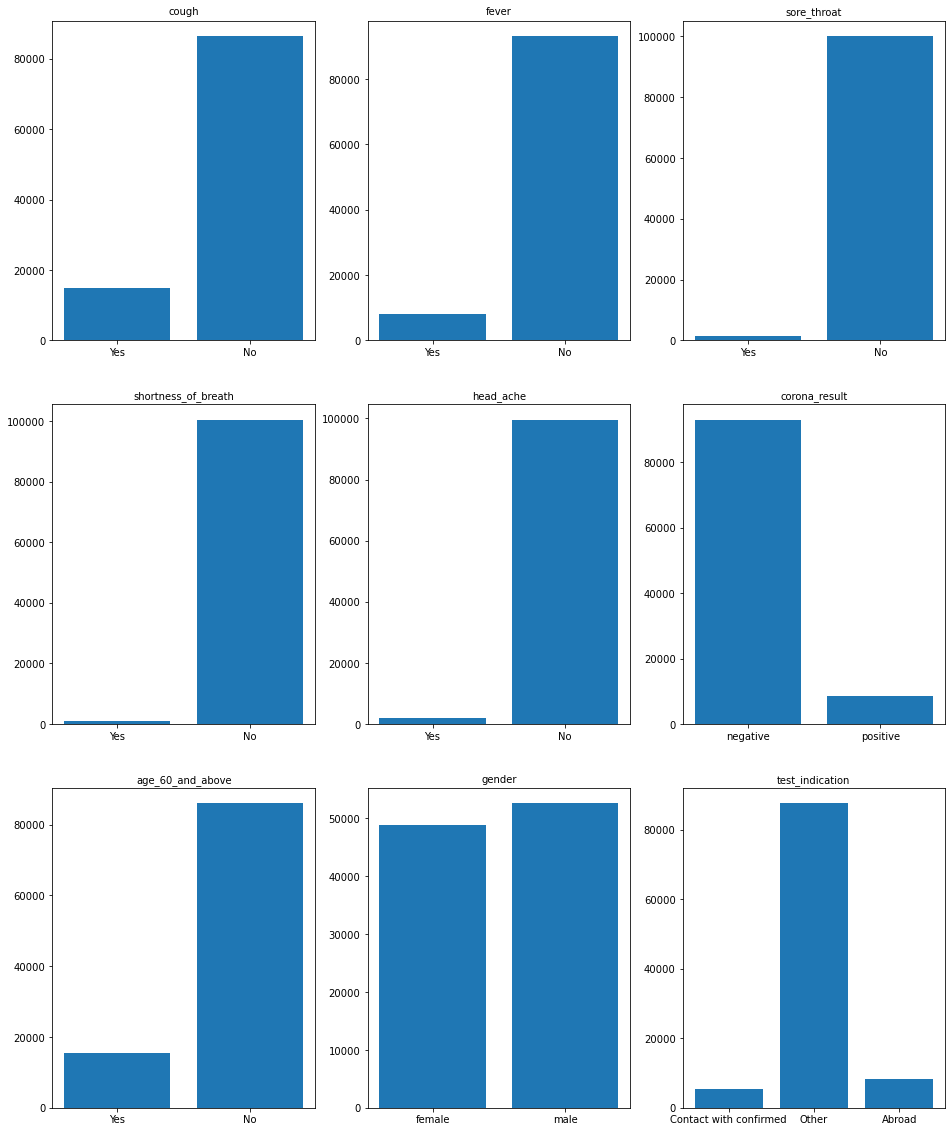

In [43]:
plt.figure(figsize = (16, 20))
column_names = list(df1.columns.values)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    x = list(set(df1[column_names[i]]))
    y = [len(df1[df1[column_names[i]] == j]) for j in x]
    plt.bar(x, y)
#         plt.ylabel('count')
    plt.title(column_names[i], fontsize = 10)
plt.show()

# 分割訓練資料 & 測試資料

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
mask = list(df.columns)
mask.remove('corona_result')
# print(mask)
x = df[mask].values
y = df['corona_result'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [46]:
print(x_train)
print(len(x_train))

[['No' 'No' 'No' ... 'Yes' 'female' 'Other']
 ['No' 'No' 'No' ... 'No' 'female' 'Other']
 ['Yes' 'No' 'No' ... 'No' 'male' 'Other']
 ...
 ['Yes' 'Yes' 'No' ... 'No' 'male' 'Other']
 ['Yes' 'Yes' 'No' ... 'No' 'male' 'Contact with confirmed']
 ['No' 'No' 'No' ... 'Yes' 'male' 'Other']]
81185


In [48]:
print(y_train)
print(len(y_train))
print('少類別之個數：', len([i for i in y_train if i == 'positive']))
print('多類別之個數：', len([j for j in y_train if j == 'negative']))

['negative' 'negative' 'positive' ... 'positive' 'positive' 'negative']
81185
少類別之個數： 6678
多類別之個數： 74507


In [49]:
# to training csv
xdata = pd.DataFrame(x_train, columns = mask)
ydata = pd.DataFrame(y_train, columns = ['corona_result'])
merge = pd.concat([xdata, ydata], axis = 1)
merge.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
81180,No,No,No,No,No,No,female,Other,negative
81181,No,No,No,No,No,No,female,Other,negative
81182,Yes,Yes,No,No,Yes,No,male,Other,positive
81183,Yes,Yes,No,No,No,No,male,Contact with confirmed,positive
81184,No,No,No,No,No,Yes,male,Other,negative


In [51]:
merge1 = merge.copy()
merge1.to_csv('Israel Covid Training Dataset All Nominal.csv', index = False)

In [52]:
# to testing csv
xtestdata = pd.DataFrame(x_test, columns = mask)
ytestdata = pd.DataFrame(y_test, columns = ['corona_result'])
mergetest = pd.concat([xtestdata, ytestdata], axis = 1)
mergetest.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
20292,No,No,No,No,No,No,female,Other,negative
20293,No,No,No,No,No,Yes,male,Other,negative
20294,No,No,No,No,No,No,male,Other,negative
20295,No,No,No,No,No,Yes,male,Other,negative
20296,No,No,No,No,No,No,female,Other,negative


In [53]:
mergetest1 = mergetest.copy()
mergetest1.to_csv('Israel Covid Testing Dataset All Nominal.csv', index = False)

# 資料不平衡處理

In [173]:
# pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [113]:
from imblearn.over_sampling import SMOTE

In [114]:
sm = SMOTE(sampling_strategy = 'minority', random_state = 5)
x_res, y_res = sm.fit_resample(x_train, y_train)
print(len(y_res))
print('少類別之個數：', len([i for i in y_res if i == 1]))
print('多類別之個數：', len([j for j in y_res if j == 0]))

149014
少類別之個數： 74507
多類別之個數： 74507


In [115]:
# check number of columns
print(len(x_res[0]))

11


In [116]:
# smoted training data to csv
xf = pd.DataFrame(x_res, columns = mask)
yf = pd.DataFrame(y_res, columns = ['corona_result'])
xf.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
149009,1,1,0,0,0,0,0,1,1,0,0
149010,1,1,0,0,1,0,0,1,0,1,0
149011,0,1,0,0,1,0,1,0,0,1,0
149012,0,0,0,0,0,0,1,0,1,0,0
149013,1,1,0,1,1,0,0,1,0,0,1


In [117]:
Israel_Covid_Dataset_Smoted = pd.concat([xf, yf], axis = 1)
Israel_Covid_Dataset_Smoted.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other,corona_result
149009,1,1,0,0,0,0,0,1,1,0,0,1
149010,1,1,0,0,1,0,0,1,0,1,0,1
149011,0,1,0,0,1,0,1,0,0,1,0,1
149012,0,0,0,0,0,0,1,0,1,0,0,1
149013,1,1,0,1,1,0,0,1,0,0,1,1


In [118]:
Israel_Covid_Dataset_Smoted.to_csv('Israel Covid Dataset Smoted.csv', index = False)

In [119]:
Israel_Covid_Dataset_Smoted1 = Israel_Covid_Dataset_Smoted.copy()
Israel_Covid_Dataset_Smoted1['corona_result'] = Israel_Covid_Dataset_Smoted['corona_result'].replace([1, 0], ['positive', 'negative'])
Israel_Covid_Dataset_Smoted1.to_csv('Israel Covid Dataset Smoted - class.csv', index = False)

# 建立模型

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB

In [ ]:
# Random Forest
random_forest = RandomForestClassifier